# Binary Logistic Regression

**Importing libraries and data**

In [438]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
import os
path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
df = pd.DataFrame(data)

**Getting familiar with data**

In [439]:
print(f'Shape of data: {data.shape}')
data.head()

Shape of data: (100, 3)


,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [440]:
data.tail()

,Exam 1,Exam 2,Admitted
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1
99,74.775893,89.529813,1


In [441]:
data.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


**Goal of exercise is to predicted whether student is admitted to university. Prediction is based on score of two exams**

In [442]:
if df.shape[0] == data.shape[0]:
  df.insert(loc=0, column='Bias', value=1)
# condition if prevent from errors that may occur if we run cell many times and add more than one column

**Dividing data into parameters and labels**

In [443]:
features, labels = np.array(df.iloc[:, :-1].values), np.array(df.iloc[:, -1].values)

**Data Visualization**

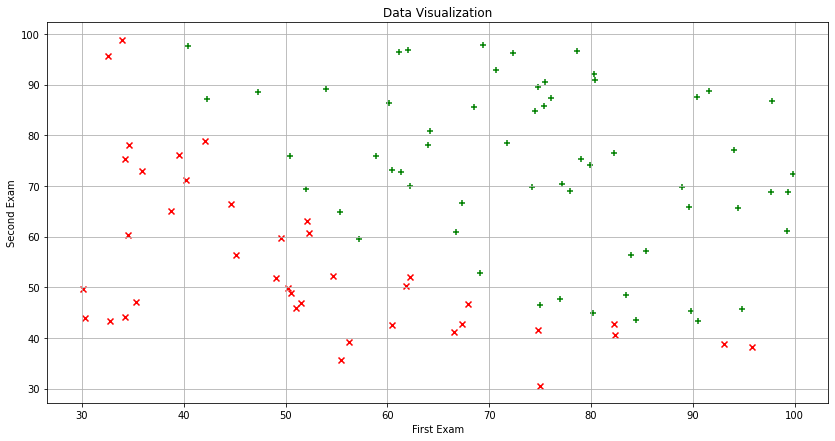

In [444]:
plt.figure(figsize=[14, 7], num=1)
for i in range(features.shape[0]):
    k = 0
    l = 0
    if labels[i]:
        plt.scatter(features[i, 1], features[i, 2], c='g', marker='+')

    else:
        plt.scatter(features[i, 1], features[i, 2], c='r', marker='x')
        
plt.grid()
plt.title("Data Visualization")
plt.xlabel("First Exam")
plt.ylabel("Second Exam")
plt.show()

In [445]:
def sigmoid(t):
  return 1.0/(1.0 + np.exp(-t))

**Checking correctness of implemented function**

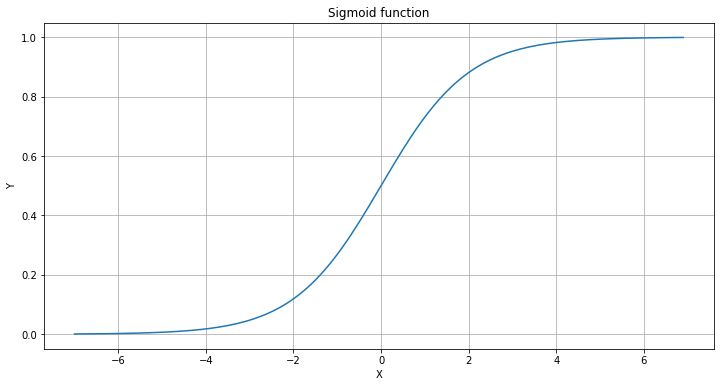

In [446]:
x_sig = np.arange(-7, 7, 0.1)
y_sig = sigmoid(x_sig)
plt.figure(figsize=[12, 6], num=2)
plt.plot(x_sig, y_sig)
plt.xlabel("X")
plt.ylabel('Y')
plt.grid()
plt.title("Sigmoid function")
plt.show()

In [447]:
X = np.array(data.iloc[:, :3].values)
y = np.array(data.iloc[:,3:].values)

In [448]:
def sigmoid(t):
  return 1.0 / (1.0 + np.exp(-t))

In [449]:
def cost_function(theta, X, y):
  m = X.shape[0]
  h = sigmoid(X @ theta) 
  a = (((1 - y.T)) @ np.log(1 - h))
  return 1 / m * ((-y.T) @ (np.log(h)) - a)

**Creating Thetas array**

In [450]:
theta = np.zeros(3)

**Normalization**

In [451]:
data["Exam 1"] = [(i - data["Exam 1"].mean())/data["Exam 1"].std() for i in data["Exam 1"]]
data["Exam 2"] = [(i - data["Exam 2"].mean())/data["Exam 2"].std() for i in data["Exam 2"]]

X = np.array(data.iloc[:, :3].values)
y = np.array(data.iloc[:,3:].values)

In [452]:
def simple_gradient(X, y, theta, alpha=1, it=150):
  cost_value = 0
  cost_lst=list()
  for i in range(it):
      h = np.matrix(sigmoid(X @ theta)) 
      
      for j in range(3):
        X_j = np.matrix(X[:,j]).T
        theta[j] = theta[j] - alpha/X.shape[0] * np.sum(((h.T - y).T) @ X_j)
      
      cost_lst.append(cost_function(theta,X,y))
  return theta, cost_lst

In [453]:
theta_opt, cost_lst = simple_gradient(X, y, theta, 1.0, 150)
theta_opt

array([1.41682812, 3.36988187, 3.122184  ])

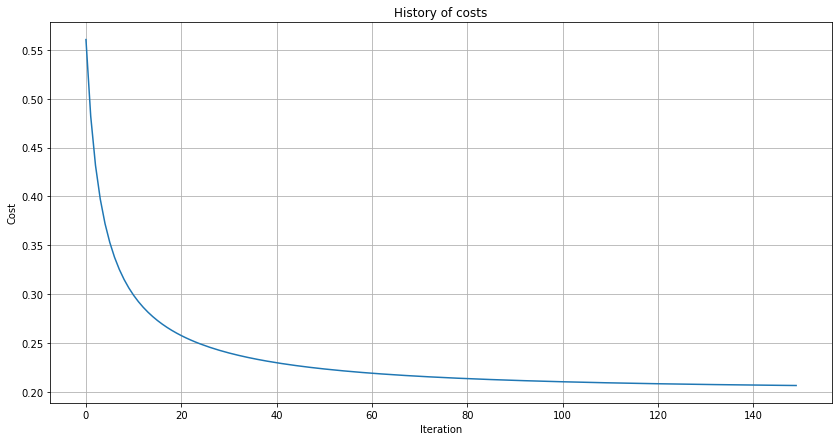

In [454]:
plt.figure(num=1, figsize=[14, 7])
plt.plot(cost_lst)
plt.title("History of costs")
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid()
plt.show()

**Verifying results**

In [455]:
y = pd.DataFrame(y, columns=['labels'])
predictions = ((sigmoid(X @ theta_opt)>= 0.5).astype(int))
y.insert(loc=1, column='pred', value=predictions)
y

,labels,pred
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
95,1,1
96,1,1
97,1,1
98,1,0


**Accuracy**

In [456]:
accuracy = y[(y['labels']==y['pred'])].count()/y.shape[0]
accuracy

labels    0.89
pred      0.89
dtype: float64

**Logistic Regression in Python**

In [457]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import mean_squared_error
 
iris = datasets.load_iris()
X = iris.data[:, :2]  # we are analyzing only 2 parameters
Y = iris.target

logreg = LogisticRegression()
logreg.fit(X, Y)

LogisticRegression()

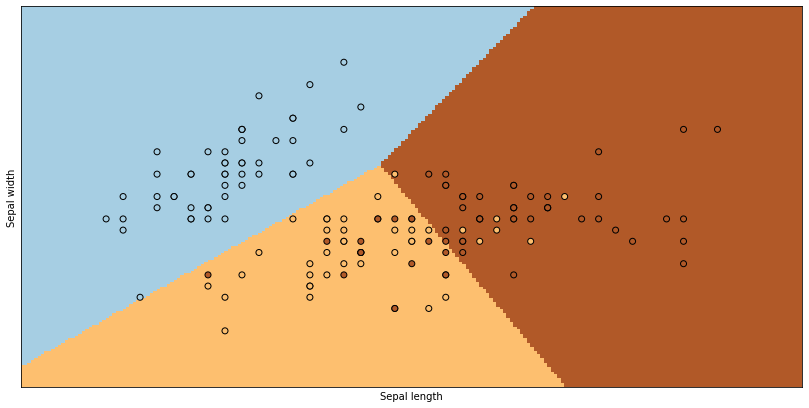

In [458]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(14, 7))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
 
plt.show()

**Predicting probability**

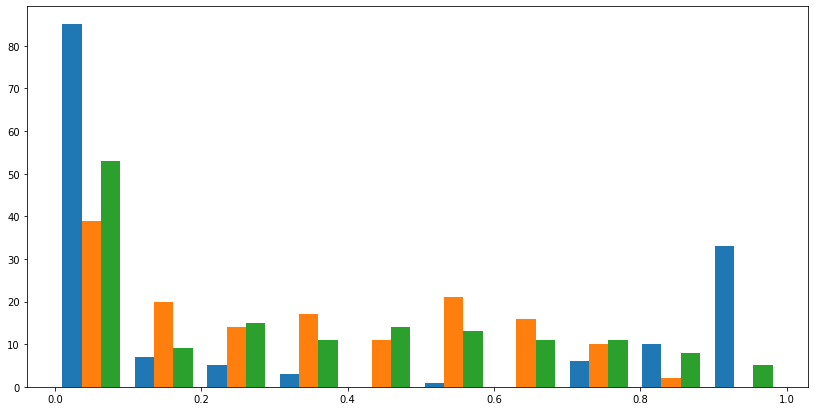

In [459]:
probability = logreg.predict_proba(X)
plt.figure(num=5, figsize=[14,7])
plt.hist(probability)
plt.show()

**Evaluation**

In [460]:
#Score  
logreg.score(X, Y)

0.82

In [461]:
# Mean Sqaured Error
Y_pred = logreg.predict(X)
mean_squared_error(Y_pred, Y)

0.18

In [462]:
# Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred, Y)

0.82